In [2]:
# Paso 1 - Carga del Conjunto de Datos
import pandas as pd
df = pd.read_csv("PorcentajeOro2.csv", encoding="latin-1")

In [ ]:
# Paso 2 - Visualización de una Muestra
df.head()

,NumDistrito,%Au,peso(grm),tamano(cm),Densidad(kg/m3),Porocidad(u.p.)
0,1,10,35.00,50.00,1.785714,94.400000
1,1,42,617.40,3704.40,31.500000,98.666667
2,1,5,8.75,6.25,0.446429,88.800000
3,1,78,2129.40,23727.60,108.642857,99.282051
4,2,63,1389.15,12502.35,70.875000,99.111111


In [25]:
# Paso 3 - Normalización de los Datos:

print(df.columns)  # Print the actual column names in the DataFrame

# Adjust the column names in the list if necessary
columnas_a_normalizar = ['%Au']

datos_a_normalizar = df[columnas_a_normalizar]
df.head()
datos_a_normalizar.head()

Index(['Distrito', '%Au', 'peso(grm)', 'tamaño(cm)', 'Densidad(kg/m3)',
       'Porocidad(u.p.)'],
      dtype='object')


,%Au
0,4
1,4
2,0
3,4
4,4


In [42]:
# Construir el modelo de clasificación
import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(5,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [43]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 5)                 0         
                                                                 
 dense_20 (Dense)            (None, 128)               768       
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 2058 (8.04 KB)
Trainable params: 2058 (8.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Entrenar el modelo
df['%Au'] = df['%Au'].apply(lambda x: min(max(0, x - 1), 9))

# Select all columns except '%Au' for training
X = df.drop('%Au', axis=1)

# Adjust the input shape of the first layer to match the new shape of X
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(5,)),  # Changed input shape to (5,)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X, df['%Au'], epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 2ms/step - loss: 1042.1594 - accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 19.9286 - accuracy: 0.5729 
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.9485 - accuracy: 0.8241
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.9548
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9447
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9950
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9849
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9950
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000


<Axes: >

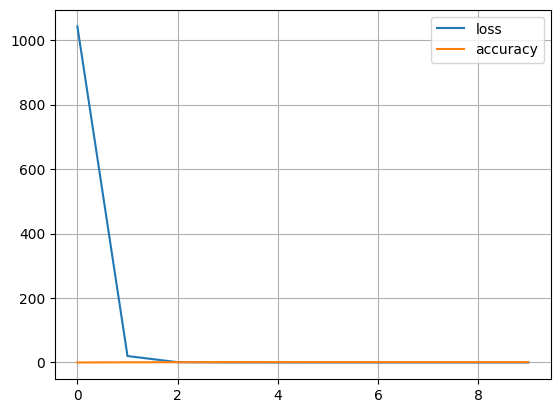

In [45]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [47]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(X, df['%Au'])
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000
loss: 0.009840314276516438
accuracy: 1.0
